In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

# Populate aerosol number concentrations as a function of height

In [59]:
path = '/discover/nobackup/mwstanfo/acp_camp2ex_ms_data/input_files/'
ds = xr.open_dataset(path+'aerosol_input_data.nc')
z = ds['height'].values*1.e-3-0.25 # midpoints
na = ds['na'].values
na_unsmoothed = ds['na_unsmoothed'].values
na_1 = na[0,:]
na_2 = na[1,:]
na_3 = na[2,:]
na_1_unsmoothed = na_unsmoothed[0,:]
na_2_unsmoothed = na_unsmoothed[1,:]
na_3_unsmoothed = na_unsmoothed[2,:]
hygro = ds['hygro'].values[0]
mean_diam = ds['mean_diam'].values
geo_stddev = ds['geo_stddev'].values
ds.close()

# Read in PSDs

In [60]:
path = '/discover/nobackup/mwstanfo/acp_camp2ex_ms_data/aerosol_data/'
file_name = path+'FIMS_PSD_for_500-m_blocks.xlsx'

dfs = pd.read_excel(file_name).T.to_dict()#, sheet_name=None)

Dp_b = np.arange(1,601,1)

In [61]:
# Get midbins of FIMS
Dp = np.array(list(dfs[0].keys())[1:])

In [62]:
target_z_1 = 0 # 0-0.5 km
target_z_2 = 5 # 2.5-3 km
target_z_3 = 11 # 5.5-6 km

#=======================================
# First block
#=======================================
Na_1_FIMS = []
dumi=True
for key,val in dfs[target_z_1].items():
    if dumi:
        dumi=False
        continue        
    val = float(val)
    Na_1_FIMS.append(val)
    
Na_1_FIMS = np.array(Na_1_FIMS)

#=======================================
# Second Block
#=======================================
Na_2_FIMS = []
dumi=True
for key,val in dfs[target_z_2].items():
    if dumi:
        dumi=False
        continue        
    val = float(val)
    Na_2_FIMS.append(val)
    
Na_2_FIMS = np.array(Na_2_FIMS)

#=======================================
# Third block
#=======================================
Na_3_FIMS = []
dumi=True
for key,val in dfs[target_z_3].items():
    if dumi:
        dumi=False
        continue        
    val = float(val)
    Na_3_FIMS.append(val)
    
Na_3_FIMS = np.array(Na_3_FIMS)

In [63]:
Dp_1 = mean_diam[0]*1.e3 # nm
Dp_2 = mean_diam[1]*1.e3 # nm
Dp_3 = mean_diam[2]*1.e3 # nm
sigma_1 = geo_stddev[0]
sigma_2 = geo_stddev[1]
sigma_3 = geo_stddev[2]

# Plot Fig. 1 of Manuscript

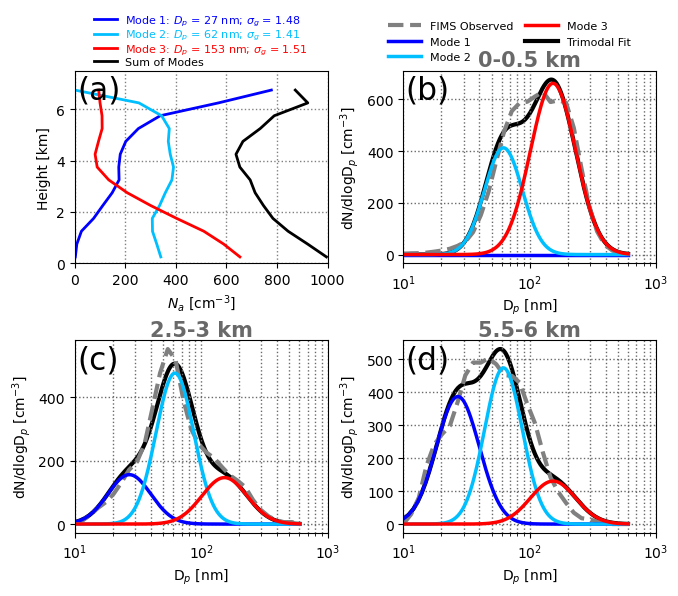

In [64]:
fig = plt.figure(figsize=(7.5,6))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)


Fontsize=10

ax1.grid(c='grey',lw=1,ls='dotted')
ax1.tick_params(labelsize=Fontsize)
ax1.set_ylabel('Height [km]',fontsize=Fontsize)
ax1.set_xlabel('$N_{a}$ [cm$^{-3}$]',fontsize=Fontsize)


str_1 = 'Mode 1'
str_1a = 'Mode 1: $D_{p}$ = 27 nm; $\\sigma_{g}$ = 1.48'
str_2 = 'Mode 2'
str_2a = 'Mode 2: $D_{p}$ = 62 nm; $\\sigma_{g}$ = 1.41'
str_3 = 'Mode 3'
str_3a = 'Mode 3: $D_{p}$ = 153 nm; $\\sigma_{g}$ = 1.51'


ax1.plot(na_1,z,lw=2,c='blue',label=str_1a)
ax1.plot(na_2,z,lw=2,c='deepskyblue',label=str_2a)
ax1.plot(na_3,z,lw=2,c='red',label=str_3a)
ax1.plot(na_1+na_2+na_3,z,lw=2,c='k',label='Sum of Modes')



    
#=========================================
# Aerosol Size Distributions
#=========================================
axlist = [ax2,ax3,ax4]

for ax in axlist:
    ax.tick_params(labelsize=Fontsize)
    ax.grid(which='both',c='dimgrey',lw=1,ls='dotted')
    ax.set_ylabel('dN/dlogD$_{p}$ [cm$^{-3}$]',fontsize=Fontsize)
    ax.set_xlabel('D$_{p}$ [nm]',fontsize=Fontsize)
    ax.set_xscale('log')
    ax.set_xlim(10,1000)
    
fac = 1./2.303

#==============================================
# First Height Block 
#==============================================
#-------------
# FIMS
#-------------
#ax2.plot(Dp,Na_1_FIMS*fac,lw=3,c='k',label='FIMS Observed')
ax2.plot(Dp,Na_1_FIMS*fac,lw=3,c='grey',label='FIMS Observed',ls='dashed')

height_id = target_z_1
#-------------
# Mode 1 
#-------------
term_1 = np.array(np.log10(np.array(Dp_b/Dp_1,dtype=float))**2.,dtype=float)
term_2 = 2.*np.array(np.log10(sigma_1)**2.,dtype=float)
dNdlogDp_1 = (na_1_unsmoothed[height_id]/(np.sqrt(2.*np.pi)*np.log10(sigma_1)))*np.exp(-term_1/term_2)
ax2.plot(Dp_b,dNdlogDp_1*fac,lw=2.5,c='blue',label='Mode 1')
#-------------
# Mode 2
#-------------
term_1 = np.array(np.log10(np.array(Dp_b/Dp_2,dtype=float))**2.,dtype=float)
term_2 = 2.*np.array(np.log10(sigma_2)**2.,dtype=float)
dNdlogDp_2 = (na_2_unsmoothed[height_id]/(np.sqrt(2.*np.pi)*np.log10(sigma_2)))*np.exp(-term_1/term_2)
ax2.plot(Dp_b,dNdlogDp_2*fac,lw=2.5,c='deepskyblue',label='Mode 2')
#-------------
# Mode 3
#-------------
term_1 = np.array(np.log10(np.array(Dp_b/Dp_3,dtype=float))**2.,dtype=float)
term_2 = 2.*np.array(np.log10(sigma_3)**2.,dtype=float)
dNdlogDp_3 = (na_3_unsmoothed[height_id]/(np.sqrt(2.*np.pi)*np.log10(sigma_3)))*np.exp(-term_1/term_2)
ax2.plot(Dp_b,dNdlogDp_3*fac,lw=2.5,c='red',label='Mode 3')
#-------------
# Sum of 3 modes
#-------------
#ax2.plot(Dp_b,(dNdlogDp_1+dNdlogDp_2+dNdlogDp_3)*fac,lw=3,c='mediumpurple',label='Trimodal Fit',ls='dashed')
ax2.plot(Dp_b,(dNdlogDp_1+dNdlogDp_2+dNdlogDp_3)*fac,lw=3,c='k',label='Trimodal Fit',ls='solid',zorder=0)

#==============================================
# Second Height Block
#==============================================
#-------------
# FIMS
#-------------
#ax3.plot(Dp,Na_2_FIMS*fac,lw=3,c='k',label='FIMS Observed')
ax3.plot(Dp,Na_2_FIMS*fac,lw=3,c='grey',label='FIMS Observed',ls='dashed')

height_id = target_z_2

#-------------
# Mode 1 
#-------------
term_1 = np.array(np.log10(np.array(Dp_b/Dp_1,dtype=float))**2.,dtype=float)
term_2 = 2.*np.array(np.log10(sigma_1)**2.,dtype=float)
dNdlogDp_1 = (na_1_unsmoothed[height_id]/(np.sqrt(2.*np.pi)*np.log10(sigma_1)))*np.exp(-term_1/term_2)
ax3.plot(Dp_b,dNdlogDp_1*fac,lw=2.5,c='blue',label='Mode 1')
#-------------
# Mode 2
#-------------
term_1 = np.array(np.log10(np.array(Dp_b/Dp_2,dtype=float))**2.,dtype=float)
term_2 = 2.*np.array(np.log10(sigma_2)**2.,dtype=float)
dNdlogDp_2 = (na_2_unsmoothed[height_id]/(np.sqrt(2.*np.pi)*np.log10(sigma_2)))*np.exp(-term_1/term_2)
ax3.plot(Dp_b,dNdlogDp_2*fac,lw=2.5,c='deepskyblue',label='Mode 2')
#-------------
# Mode 3
#-------------
term_1 = np.array(np.log10(np.array(Dp_b/Dp_3,dtype=float))**2.,dtype=float)
term_2 = 2.*np.array(np.log10(sigma_3)**2.,dtype=float)
dNdlogDp_3 = (na_3_unsmoothed[height_id]/(np.sqrt(2.*np.pi)*np.log10(sigma_3)))*np.exp(-term_1/term_2)
ax3.plot(Dp_b,dNdlogDp_3*fac,lw=2.5,c='red',label='Mode 3')
#-------------
# Sum of 3 modes
#-------------
#ax3.plot(Dp_b,(dNdlogDp_1+dNdlogDp_2+dNdlogDp_3)*fac,lw=3,c='mediumpurple',label='Trimodal Fit',ls='dashed')
ax3.plot(Dp_b,(dNdlogDp_1+dNdlogDp_2+dNdlogDp_3)*fac,lw=3,c='k',label='Trimodal Fit',ls='solid',zorder=0)

#==============================================
# Third Height Block
#==============================================
#-------------
# FIMS
#-------------
#ax4.plot(Dp,Na_3_FIMS*fac,lw=3,c='k',label='FIMS Observed')
ax4.plot(Dp,Na_3_FIMS*fac,lw=3,c='grey',label='FIMS Observed',ls='dashed')

height_id = target_z_3
#-------------
# Mode 1 
#-------------
term_1 = np.array(np.log10(np.array(Dp_b/Dp_1,dtype=float))**2.,dtype=float)
term_2 = 2.*np.array(np.log10(sigma_1)**2.,dtype=float)
dNdlogDp_1 = (na_1_unsmoothed[height_id]/(np.sqrt(2.*np.pi)*np.log10(sigma_1)))*np.exp(-term_1/term_2)
ax4.plot(Dp_b,dNdlogDp_1*fac,lw=2.5,c='blue',label='Mode 1')
#-------------
# Mode 2
#-------------
term_1 = np.array(np.log10(np.array(Dp_b/Dp_2,dtype=float))**2.,dtype=float)
term_2 = 2.*np.array(np.log10(sigma_2)**2.,dtype=float)
dNdlogDp_2 = (na_2_unsmoothed[height_id]/(np.sqrt(2.*np.pi)*np.log10(sigma_2)))*np.exp(-term_1/term_2)
ax4.plot(Dp_b,dNdlogDp_2*fac,lw=2.5,c='deepskyblue',label='Mode 2')
#-------------
# Mode 3
#-------------
term_1 = np.array(np.log10(np.array(Dp_b/Dp_3,dtype=float))**2.,dtype=float)
term_2 = 2.*np.array(np.log10(sigma_3)**2.,dtype=float)
dNdlogDp_3 = (na_3_unsmoothed[height_id]/(np.sqrt(2.*np.pi)*np.log10(sigma_3)))*np.exp(-term_1/term_2)
ax4.plot(Dp_b,dNdlogDp_3*fac,lw=2.5,c='red',label='Mode 3')
#-------------
# Sum of 3 modes
#-------------
#ax4.plot(Dp_b,(dNdlogDp_1+dNdlogDp_2+dNdlogDp_3)*fac,lw=3,c='mediumpurple',label='Trimodal Fit',ls='dashed')
ax4.plot(Dp_b,(dNdlogDp_1+dNdlogDp_2+dNdlogDp_3)*fac,lw=3,c='k',label='Trimodal Fit',ls='solid',zorder=0)


dumy=0.98
ax2.set_title('0-0.5 km',fontsize=Fontsize*1.5,fontweight='bold',c='dimgrey',y=dumy)
#ax3.set_title('1-1.5 km',fontsize=Fontsize*1.5,fontweight='bold',c='dimgrey')
ax3.set_title('2.5-3 km',fontsize=Fontsize*1.5,fontweight='bold',c='dimgrey',y=dumy)
#ax4.set_title('2-2.5 km',fontsize=Fontsize*1.5,fontweight='bold',c='dimgrey')
ax4.set_title('5.5-6 km',fontsize=Fontsize*1.5,fontweight='bold',c='dimgrey',y=dumy)
    
    
leg = ax1.legend(loc='upper center',bbox_to_anchor=(0.5,1.35),fontsize=Fontsize*0.8,ncol=1,framealpha=False,labelspacing=0)
dumi = 0
for text in leg.get_texts():
    if dumi == 0:
        plt.setp(text, color = 'blue')
    elif dumi == 1:
        plt.setp(text, color = 'deepskyblue')
    elif dumi == 2:
        plt.setp(text, color = 'red')
    dumi+=1
    
#ax2.legend(loc='upper center',fontsize=Fontsize*0.85,bbox_to_anchor=(0.49,1.35),framealpha=False,ncol=2)
ax2.legend(loc='upper center',fontsize=Fontsize*0.8,bbox_to_anchor=(0.42,1.31),framealpha=False,ncol=2,columnspacing=1,\
          handlelength=3,labelspacing=0.5)
#ax3.legend(loc='upper center',fontsize=Fontsize*0.8,bbox_to_anchor=(1.2,1.3),framealpha=False,ncol=2,columnspacing=1)
    
    
axlist = [ax1,ax2,ax3,ax4]
labs = ['(a)','(b)','(c)','(d)']
dumi=0
for ax in axlist:
    #ax.text(-0.2,1.05,labs[dumi],fontsize=Fontsize*2.5,transform=ax.transAxes)
    ax.text(0.01,0.98,labs[dumi],fontsize=Fontsize*2.25,transform=ax.transAxes,va='top',ha='left')
    dumi+=1

    
#ax1.set_xlim(0,800)
ax1.set_xlim(0,1000)
ax1.set_ylim(0,7.5)

ax2.set_xlim(10,1.e3)
#ax2.set_ylim(0,610)

ax3.set_xlim(10,1.e3)
#ax3.set_ylim(0,410)

ax4.set_xlim(10,1.e3)
#ax4.set_ylim(0,500)

plt.subplots_adjust(wspace=0.3,hspace=0.4)

fig_path = '/discover/nobackup/mwstanfo/figures/camp2ex_paper/'
outfile = 'fig_aero_psds_profs.png'
#plt.savefig(fig_path+outfile,dpi=200,bbox_inches='tight')
plt.show()
plt.close()
